In [23]:
!pip install bs4 pandas matplotlib seaborn wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter

from bs4 import BeautifulSoup

In [25]:
df = pd.read_csv('stackoverflow-pytorch.csv')

In [26]:
df

,question_body,answer_body,answer_score
0,"<p>While ""googl'ing"" and doing some research I were not able to find <strong>any</strong> seriou...","<p><strong>Edit 1</strong> See <a href=""https://stackoverflow.com/a/32690414/4013571"">Mikael Rou...",39.0
1,"<p>I have a huge list of numpy arrays, where each array represents an image and I want to load i...",<p>I think what DataLoader actually requires is an input that subclasses <code>Dataset</code>. Y...,159.0
2,<p>\nIs there a Pytorch-internal procedure to detect <code>NaN</code>s in Tensors? Tensorflow ha...,<p>You can always leverage the fact that <code>nan != nan</code>:</p>\n\n<pre><code>&gt;&gt;&gt;...,80.0
3,"<p>Following up the question from <a href=""https://stackoverflow.com/questions/54246548/how-to-u...",<h1>List of differences between hand-rolled code and PyTorch code</h1>\n\n<p>Turns out there are...,12.0
4,<p>I get this error while trying to build a multiclass text classification network using LSTM (R...,<p>Try adding <code>drop_last=True</code> in your line of codes that loads data using DataLoader...,12.0
...,...,...,...
24282,<p>I am trying to install a specific version of pytorch that is compatible with a specific cuda ...,<p>The problem with the approach above lies in the structure of <code>https://download.pytorch.o...,8.0
24283,"<p>I want to print the model's validation loss in each epoch, what is the right way to get and p...","<p><strong>NO!!!!</strong><br />\n<a href=""https://i.stack.imgur.com/pncMq.gif"" rel=""noreferrer""...",8.0
24284,"<p>We can allocate a tensor on GPU using <code>torch.Tensor([1., 2.], device='cuda')</code>. Are...",<p>So generally both <code>torch.Tensor</code> and <code>torch.cuda.Tensor</code> are equivalent...,8.0
24285,"<p>I am having some trouble getting <code>torch.nn.functional</code> working as I would like, il...",<p>Have you tried passing the argument <code>align_corners = True</code>? If you read the docume...,8.0


In [27]:
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_colwidth', 100)

In [28]:
print("Размер датасета:", df.shape)
df.head()

Размер датасета: (24287, 3)


,question_body,answer_body,answer_score
0,"<p>While ""googl'ing"" and doing some research I were not able to find <strong>any</strong> seriou...","<p><strong>Edit 1</strong> See <a href=""https://stackoverflow.com/a/32690414/4013571"">Mikael Rou...",39.0
1,"<p>I have a huge list of numpy arrays, where each array represents an image and I want to load i...",<p>I think what DataLoader actually requires is an input that subclasses <code>Dataset</code>. Y...,159.0
2,<p>\nIs there a Pytorch-internal procedure to detect <code>NaN</code>s in Tensors? Tensorflow ha...,<p>You can always leverage the fact that <code>nan != nan</code>:</p>\n\n<pre><code>&gt;&gt;&gt;...,80.0
3,"<p>Following up the question from <a href=""https://stackoverflow.com/questions/54246548/how-to-u...",<h1>List of differences between hand-rolled code and PyTorch code</h1>\n\n<p>Turns out there are...,12.0
4,<p>I get this error while trying to build a multiclass text classification network using LSTM (R...,<p>Try adding <code>drop_last=True</code> in your line of codes that loads data using DataLoader...,12.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24287 entries, 0 to 24286
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   question_body  24287 non-null  object 
 1   answer_body    17343 non-null  object 
 2   answer_score   17343 non-null  float64
dtypes: float64(1), object(2)
memory usage: 569.4+ KB


In [30]:
df.describe()

,answer_score
count,17343.000000
mean,2.647869
std,11.571693
min,-7.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,663.000000


In [31]:
df.isnull().sum()

question_body       0
answer_body      6944
answer_score     6944
dtype: int64

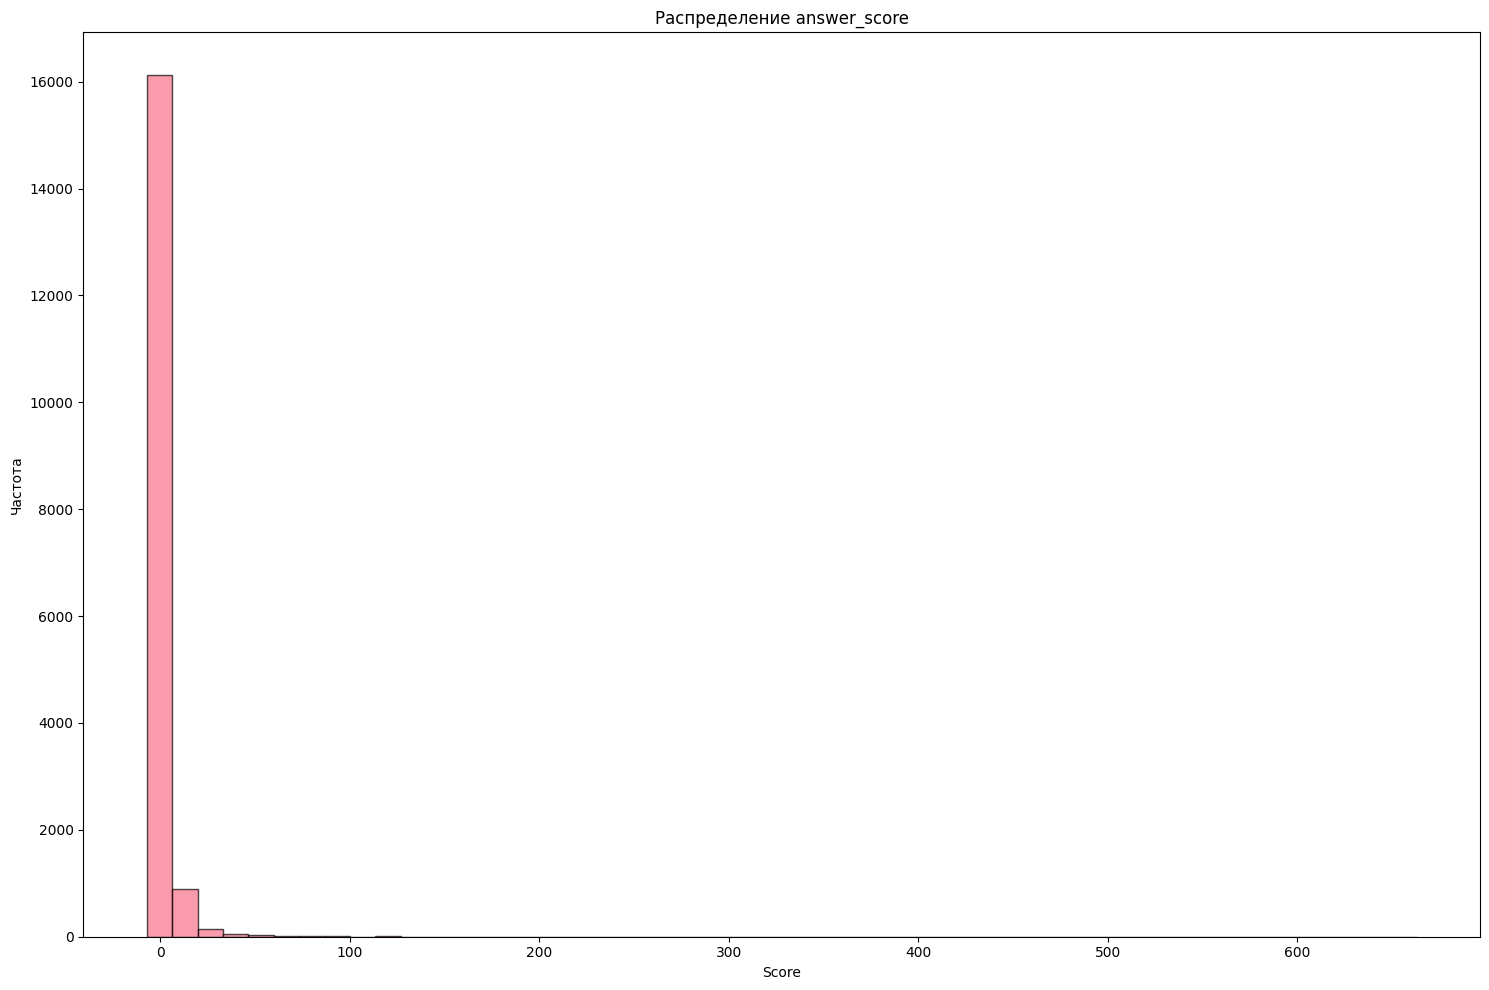

In [32]:
plt.figure(figsize=(15, 10))
plt.hist(df['answer_score'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение answer_score')
plt.xlabel('Score')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

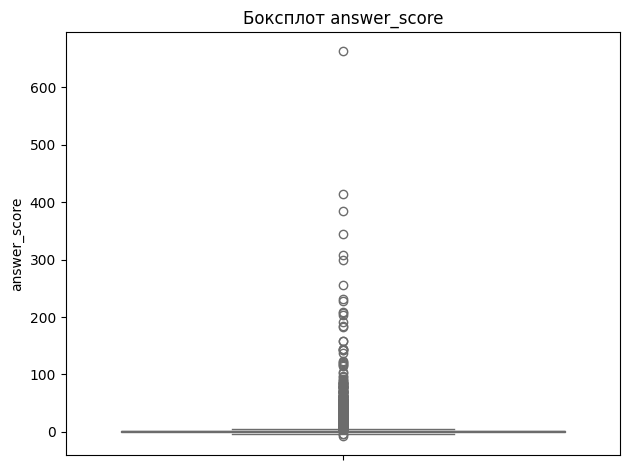

In [33]:
sns.boxplot(y=df['answer_score'])
plt.title('Боксплот answer_score')
plt.tight_layout()
plt.show()

In [34]:
def clean_html(text):
    """Очистка HTML тегов из текста"""
    if isinstance(text, str):
        return re.sub('<.*?>', '', text)
    return text

In [35]:
df['question_clean'] = df['question_body'].apply(clean_html)
df['answer_clean'] = df['answer_body'].apply(clean_html)

df['question_length'] = df['question_clean'].str.len()
df['answer_length'] = df['answer_clean'].str.len()

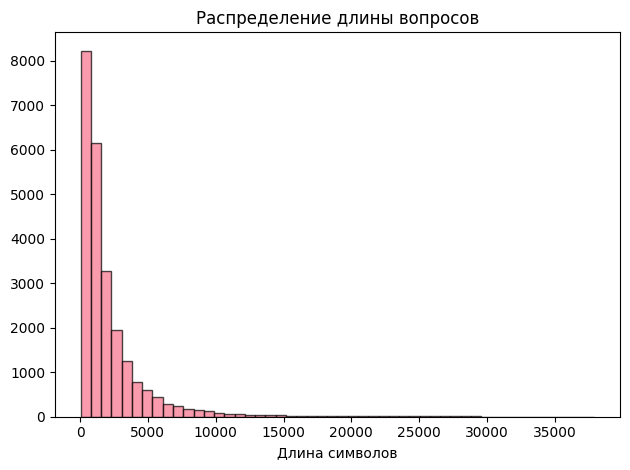

In [36]:
plt.hist(df['question_length'].dropna(), bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение длины вопросов')
plt.xlabel('Длина символов')
plt.tight_layout()
plt.show()

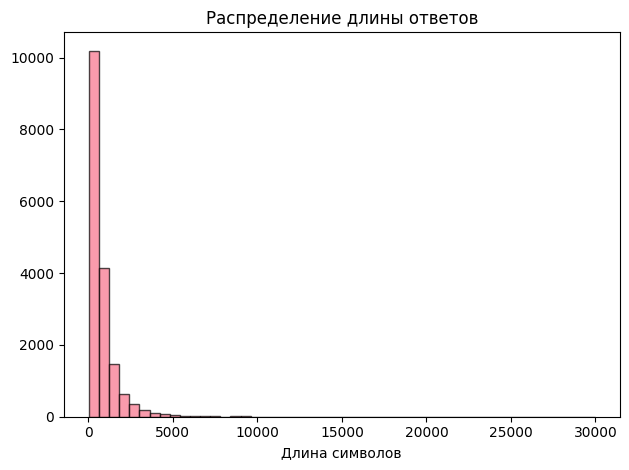

In [37]:
plt.hist(df['answer_length'].dropna(), bins=50, alpha=0.7, edgecolor='black')
plt.title('Распределение длины ответов')
plt.xlabel('Длина символов')
plt.tight_layout()
plt.show()

In [38]:
print(BeautifulSoup(df[df.answer_length > 10000].answer_clean.iloc[0]).prettify())

List of differences between hand-rolled code and PyTorch code

Turns out there are a lot of differences between what your hand-rolled code and the PyTorch code are doing. Here's what I uncovered, listed roughly in order of most to least impact on the output:


Your code and the PyTorch code use two different functions to report the loss.
Your code and the PyTorch code set up the initial weights very differently. You mention this in your question, but it turns out to have a pretty significant impact on the results.
By default, the torch.nn.Linear layers add an extra bunch of "bias" weights to the model. Thus, the 1st layer of the Pytorch model effectively has 3x5 weights and the second layer has 6x1 weights. The layers in the hand-rolled code have 2x5 and 5x1 weights, respectively.


The bias seems to help the model to learn and adapt somewhat faster. If you turn the bias off, it takes roughly twice as many training epochs for the Pytorch model to reach near 0 loss.

Curiously, it seems

In [39]:
print(BeautifulSoup(df[df.answer_length > 10000].question_clean.iloc[0]).prettify())

Following up the question from How to update the learning rate in a two layered multi-layered perceptron?

Given the XOR problem:

X = xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = xor_output = np.array([[0,1,1,0]]).T


And a simple 


two layered Multi-Layered Perceptron (MLP) with 
sigmoid activations between them and 
Mean Square Error (MSE) as the loss function/optimization criterion


If we train the model from scratch as such:

from itertools import chain
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

def sigmoid(x): # Returns values that sums to one.
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sx):
    # See https://math.stackexchange.com/a/1225116
    return sx * (1 - sx)

# Cost functions.
def mse(predicted, truth):
    return 0.5 * np.mean(np.square(predicted - truth))

def mse_derivative(predicted, truth):
    return predicted - truth

X = xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = xor_output = np.array([[0,1,1,0]]).T



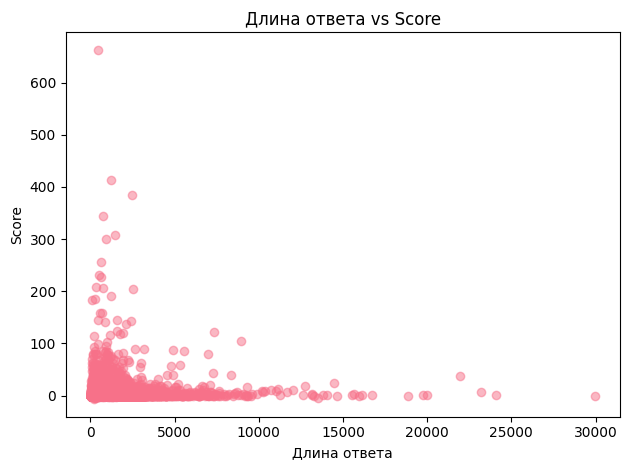

In [40]:
plt.scatter(df['answer_length'], df['answer_score'], alpha=0.5)
plt.title('Длина ответа vs Score')
plt.xlabel('Длина ответа')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

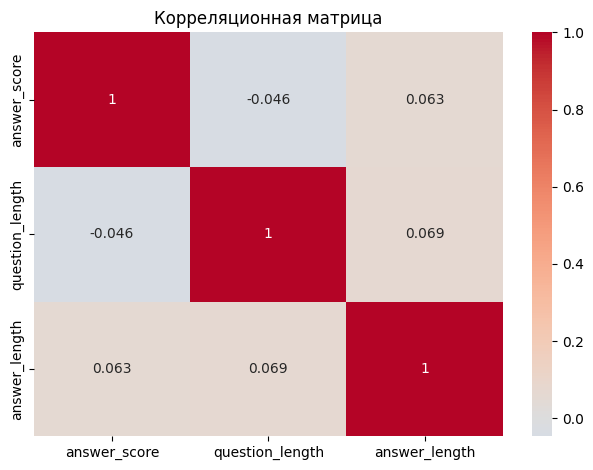

In [41]:
numeric_cols = ['answer_score', 'question_length', 'answer_length']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

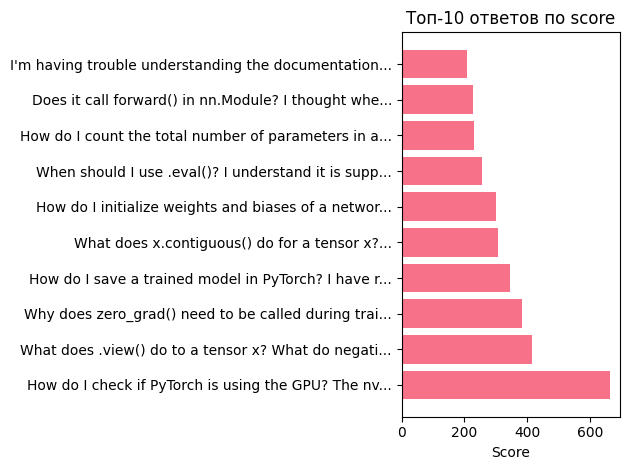

In [42]:
top_answers = df.nlargest(10, 'answer_score')[['answer_score', 'question_clean']]
top_answers['question_short'] = top_answers['question_clean'].str[:50] + '...'
plt.barh(range(len(top_answers)), top_answers['answer_score'])
plt.yticks(range(len(top_answers)), top_answers['question_short'])
plt.title('Топ-10 ответов по score')
plt.xlabel('Score')
plt.tight_layout()
plt.show()

In [43]:
BeautifulSoup(df[df.answer_score > 600].question_body.iloc[0])

<p>How do I check if PyTorch is using the GPU? The <code>nvidia-smi</code> command can detect GPU activity, but I want to check it directly from inside a Python script.</p>

In [44]:
BeautifulSoup(df[df.answer_score > 600].answer_body.iloc[0])

<p>These functions should help:</p>
<pre><code>&gt;&gt;&gt; import torch

&gt;&gt;&gt; torch.cuda.is_available()
True

&gt;&gt;&gt; torch.cuda.device_count()
1

&gt;&gt;&gt; torch.cuda.current_device()
0

&gt;&gt;&gt; torch.cuda.device(0)
&lt;torch.cuda.device at 0x7efce0b03be0&gt;

&gt;&gt;&gt; torch.cuda.get_device_name(0)
'GeForce GTX 950M'
</code></pre>
<p>This tells us:</p>
<ul>
<li>CUDA is available and can be used by one device.</li>
<li><code>Device 0</code> refers to the GPU <code>GeForce GTX 950M</code>, and it is currently chosen by PyTorch.</li>
</ul>

In [45]:
def get_top_words(text_series, n=20):
    """Получить топ-N слов из серии текстов"""
    all_text = ' '.join(text_series.dropna().astype(str))
    words = re.findall(r'\b\w+\b', all_text.lower())

    stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'}
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return Counter(words).most_common(n)

In [46]:
top_question_words = get_top_words(df['question_clean'])
top_answer_words = get_top_words(df['answer_clean'])

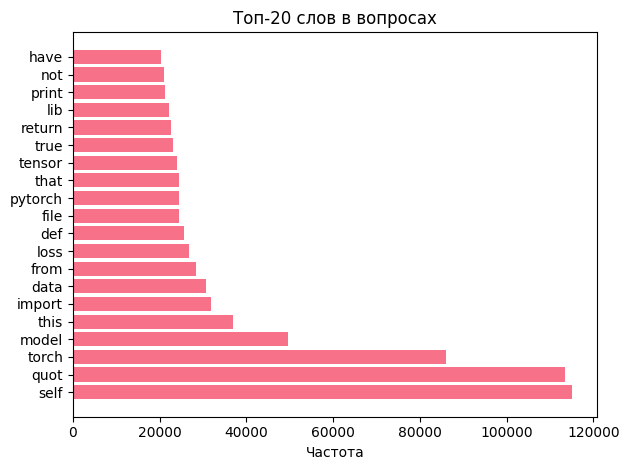

In [47]:
question_words, question_counts = zip(*top_question_words)
plt.barh(range(len(question_words)), question_counts)
plt.yticks(range(len(question_words)), question_words)
plt.title('Топ-20 слов в вопросах')
plt.xlabel('Частота')
plt.tight_layout()
plt.show()

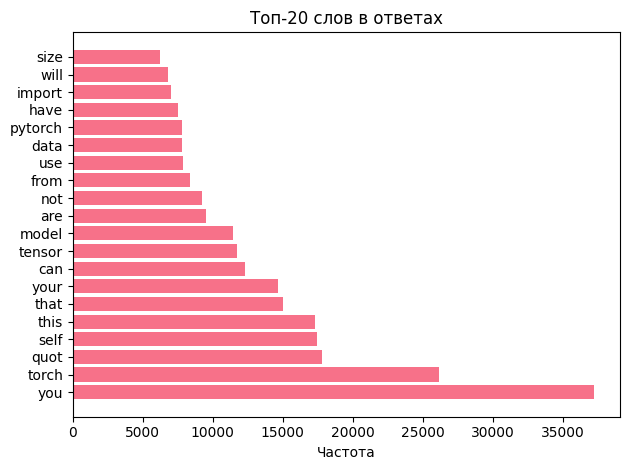

In [48]:
answer_words, answer_counts = zip(*top_answer_words)
plt.barh(range(len(answer_words)), answer_counts)
plt.yticks(range(len(answer_words)), answer_words)
plt.title('Топ-20 слов в ответах')
plt.xlabel('Частота')
plt.tight_layout()
plt.show()

In [49]:
def create_wordcloud(text_series, title):
    """Создать облако слов"""
    text = ' '.join(text_series.dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

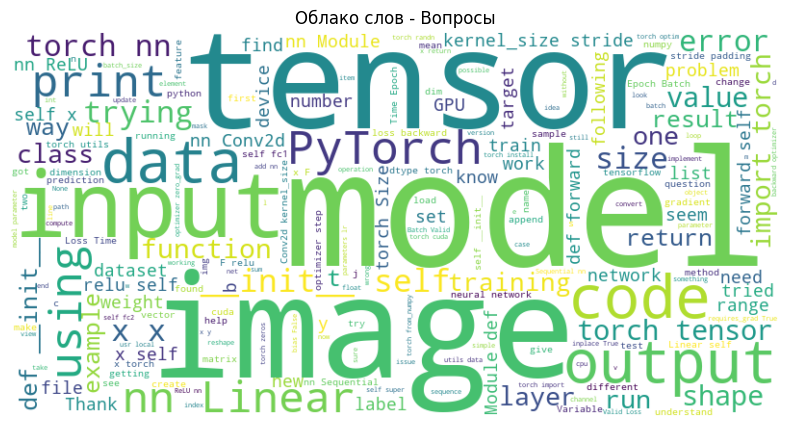

In [50]:
create_wordcloud(
    df[
        ~df['question_clean'].str.contains('quot')
        & ~df['question_clean'].str.contains('&gt')
        & ~df['question_clean'].str.contains('pytorch')
        & ~df['question_clean'].str.contains('want')
        & ~df['question_clean'].str.contains('use')
    ]['question_clean'], 
    'Облако слов - Вопросы'
)

In [51]:
df.answer_clean

0        Edit 1 See Mikael Rousson's answer - Amazon is now the way forwards as you can "rent" computatio...
1        I think what DataLoader actually requires is an input that subclasses Dataset. You can either wr...
2        You can always leverage the fact that nan != nan:\n\n&gt;&gt;&gt; x = torch.tensor([1, 2, np.nan...
3        List of differences between hand-rolled code and PyTorch code\n\nTurns out there are a lot of di...
4        Try adding drop_last=True in your line of codes that loads data using DataLoader,\nfor example f...
                                                        ...                                                 
24282    The problem with the approach above lies in the structure of https://download.pytorch.org/whl/to...
24283    NO!!!!\n\nUnder no circumstances should you train your model (i.e., call loss.backward() + optim...
24284    So generally both torch.Tensor and torch.cuda.Tensor are equivalent. You can do everything you l...
24285    Have you t

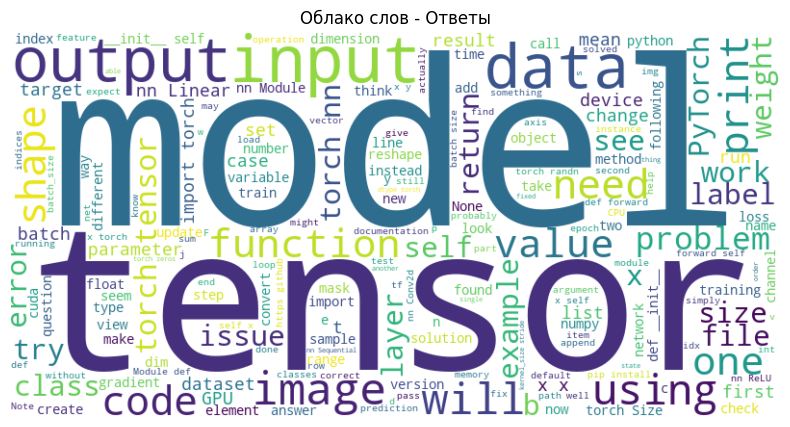

In [55]:
mini_df = df[~df.answer_clean.isnull()]
create_wordcloud(
    mini_df[
        ~mini_df['answer_clean'].str.contains('quot')
        & ~mini_df['answer_clean'].str.contains('&gt')
        & ~mini_df['answer_clean'].str.contains('pytorch')
        & ~mini_df['answer_clean'].str.contains('want')
        & ~mini_df['answer_clean'].str.contains('use')
    ]['answer_clean'], 
    'Облако слов - Ответы'
)

In [ ]:
bins = [0, 1, 5, 10, 20, 50, 100, float('inf')]
labels = ['0-1', '2-5', '6-10', '11-20', '21-50', '51-100', '100+']
df['score_range'] = pd.cut(df['answer_score'], bins=bins, labels=labels, right=False)

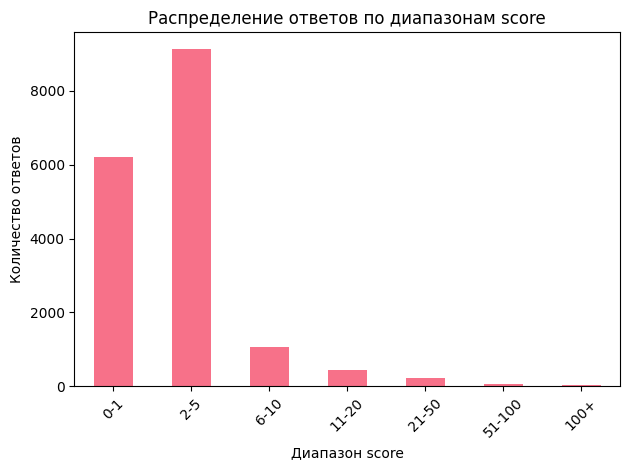

In [ ]:
score_range_counts = df['score_range'].value_counts().sort_index()
score_range_counts.plot(kind='bar')
plt.title('Распределение ответов по диапазонам score')
plt.xlabel('Диапазон score')
plt.ylabel('Количество ответов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()